# Chapter 5

## Reinforcement

In [1]:
#---R5-1---Execute the experiment from Code Fragment 5.1 and compare the results on your system to those we report in Code Fragment 5.2.
import sys


def func1(n):
    data = []
    b_old = sys.getsizeof(data)
    for k in range(n):
        
        a = len(data)
        b = sys.getsizeof(data)
        print(f'Length: {a:3d}; size in bytes: {b:4d}', end = '')
        if b_old != b:
            print('\t\tA jump of: {0} bytes, or a ratio of {1}'.format((b-b_old), (b/b_old)))
        else:
            print('')
        data.append(None)
        b_old = b

        
func1(100)

"""Note, on my computer, I was consistenly 8 bytes below the example in the textbook, although all the numbers 
were otherwise the same"""

Length:   0; size in bytes:   56
Length:   1; size in bytes:   88		A jump of: 32 bytes, or a ratio of 1.5714285714285714
Length:   2; size in bytes:   88
Length:   3; size in bytes:   88
Length:   4; size in bytes:   88
Length:   5; size in bytes:  120		A jump of: 32 bytes, or a ratio of 1.3636363636363635
Length:   6; size in bytes:  120
Length:   7; size in bytes:  120
Length:   8; size in bytes:  120
Length:   9; size in bytes:  184		A jump of: 64 bytes, or a ratio of 1.5333333333333334
Length:  10; size in bytes:  184
Length:  11; size in bytes:  184
Length:  12; size in bytes:  184
Length:  13; size in bytes:  184
Length:  14; size in bytes:  184
Length:  15; size in bytes:  184
Length:  16; size in bytes:  184
Length:  17; size in bytes:  256		A jump of: 72 bytes, or a ratio of 1.391304347826087
Length:  18; size in bytes:  256
Length:  19; size in bytes:  256
Length:  20; size in bytes:  256
Length:  21; size in bytes:  256
Length:  22; size in bytes:  256
Length:  23; size in b

'Note, on my computer, I was consistenly 8 bytes below the example in the textbook, although all the numbers \nwere otherwise the same'

In [2]:
#---R5-2---In Code Fragment 5.1, we perform an experiment to compare the length of a Python list to its underlying memory usage. Determining the sequence
#of array sizes requires a manual inspection of the output of that program. Redesign the experiment so that the program outputs only those values of
#k at which the existing capacity is exhausted. For example, on a system consistent with the results of Code Fragment 5.2, your program should
#output that the sequence of array capacities are 0, 4, 8, 16, 25, . . . .
import sys
def array_jumps(n):
    data = []
    size_old = 0
    for _ in range(n):
        size = sys.getsizeof(data)
        if size != size_old:
            print(len(data), end = ', ')
        size_old = size
        data.append(None)
        
array_jumps(10000)

0, 1, 5, 9, 17, 26, 36, 47, 59, 73, 89, 107, 127, 149, 174, 202, 234, 270, 310, 355, 406, 463, 527, 599, 680, 772, 875, 991, 1121, 1268, 1433, 1619, 1828, 2063, 2327, 2624, 2959, 3335, 3758, 4234, 4770, 5373, 6051, 6814, 7672, 8638, 9724, 

In [3]:
#---R5-3---Modify the experiment from Code Fragment 5.1 in order to demonstrate that Python’s list class occasionally shrinks the size of its underlying array
#when elements are popped from a list.
"To demonstrate the shrinking, we will grow the array normally, then shrink it when it reaches a power of 10"


import sys


def array_grow_shrink(n, lower_limit = 0.2):
    data = []
    size_old = 0
    current_limit = 10
    for i in range(n):
        if i == current_limit:
            while len(data)> current_limit*lower_limit:
                data.pop()
                size = sys.getsizeof(data)
                print(len(data), size, end = '\t\t')
                if size<size_old:
                    print ('Size decreased from:', size_old, size)
                else: print("")
                size_old = size
            current_limit *= 10
        data.append(None)
        
        
array_grow_shrink(1000)

9 184		
8 184		
7 136		Size decreased from: 184 136
6 136		
5 136		
4 112		Size decreased from: 136 112
3 112		
2 96		Size decreased from: 112 96
91 920		
90 920		
89 920		
88 920		
87 920		
86 920		
85 920		
84 920		
83 920		
82 920		
81 920		
80 920		
79 920		
78 920		
77 920		
76 920		
75 920		
74 920		
73 920		
72 920		
71 920		
70 920		
69 920		
68 920		
67 920		
66 920		
65 920		
64 920		
63 920		
62 920		
61 920		
60 920		
59 920		
58 920		
57 920		
56 920		
55 920		
54 920		
53 576		Size decreased from: 920 576
52 576		
51 576		
50 576		
49 576		
48 576		
47 576		
46 576		
45 576		
44 576		
43 576		
42 576		
41 576		
40 576		
39 576		
38 576		
37 576		
36 576		
35 576		
34 576		
33 576		
32 576		
31 376		Size decreased from: 576 376
30 376		
29 376		
28 376		
27 376		
26 376		
25 376		
24 376		
23 376		
22 376		
21 376		
20 376		


In [4]:
#---R5-4---Our DynamicArray class, as given in Code Fragment 5.3, does not support use of negative indices with getitem . Update that method to better
#match the semantics of a Python list.
def __getitem__(self,k):
    if not -self._n <= k < self._n:
        raise IndexError('Invalid index')
    return self._A[k] if k >= 0 else self._A[self._n + k]

In [5]:
#---R5-5---Redo the justiﬁcation of Proposition 5.1 assuming that the the cost of growing the array from size k to size 2k is 3k cyber-dollars. How much
#should each append operation be charged to make the amortization work?
"""
If the cost of growing an array from size k to size 2K is 3k cyber dollars, we  know that we need 
to accumulate at least 3K cyber dollars during the preceding appends

For an array of length k, half are filled in so we only actually have k/2 insertions from which to 
get a surplus of 3K.  That means we need (k/2)*(dollars per operation) = 3K or
dollars per operation = 6.  That means that we need to overcharge by exactly 6 cyber-dollars for each
operation

Note that since 6 is a constant, is still means that we have amortized the cost to be O(1) for an insertion

If our value was 6k or something like that, it would grow linearly with n, giving us O(n) overall

"""

'\nIf the cost of growing an array from size k to size 2K is 3k cyber dollars, we  know that we need \nto accumulate at least 3K cyber dollars during the preceding appends\n\nFor an array of length k, half are filled in so we only actually have k/2 insertions from which to \nget a surplus of 3K.  That means we need (k/2)*(dollars per operation) = 3K or\ndollars per operation = 6.  That means that we need to overcharge by exactly 6 cyber-dollars for each\noperation\n\nNote that since 6 is a constant, is still means that we have amortized the cost to be O(1) for an insertion\n\nIf our value was 6k or something like that, it would grow linearly with n, giving us O(n) overall\n\n'

In [6]:
#---R5-6---Our implementation of insert for the DynamicArray class, as given in Code Fragment 5.5, has the following inefﬁciency. In the case when a resize 
#occurs, the resize operation takes time to copy all the elements from an old array to a new array, and then the subsequent loop in the body of
#insert shifts many of those elements. Give an improved implementation of the insert method, so that, in the case of a resize, the elements are
#shifted into their ﬁnal position during that operation, thereby avoiding the subsequent shifting.
def _insert_resize(self, c, k):
        #Don't add anything here, just leave a space for the future insertion
        B = self._make_array(c)
        for i in range(self._n):
            if i<k: B[i] = self._A[i]
            else: B[i+1] = self._A[i]
        self._A = B
        self._capacity = c
def insert(self, k, value):
        if self._n == self._capacity:
            self._insert_resize(2*self._capacity, k)
        else:
            for j in range(self._n, k, -1):
                self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1

In [7]:
#---R5-7---Let A be an array of size n ≥ 2 containing integers from 1 to n − 1, inclusive, with exactly one repeated. 
#Describe a fast algorithm for ﬁnding the integer in A that is repeated.
"""
One approach is to do this in O(n) time by using O(n) space
"""
def find_repeat(S):
    length = len(S)
    array_check = [0]*(length)
    for element in S:
        if array_check[element]: return element
        else: array_check[element] = 1
    return ('No duplicate found')

"""
Another fun approach is to realize that the sum of the array is sum(1 to n-1) + the extra number
But this approach is less generalizable (it only works under these specific rules)

"""

def find_repeat_fun(S):
    length = len(S)
    #we know that the sum is (n)(n+1)/2 and that n = length-1
    total = (length-1)*(length)/2
    for element in S:
        total -= element
    return int(-total)

In [8]:
#---R5-8---Experimentally evaluate the efﬁciency of the pop method of Python’s list class when using varying indices as a parameter, as we did for insert on
#page 205. Report your results akin to Table 5.5.
import time
import pandas as pd
import matplotlib.pyplot as plt

def time_pops(test_array):
    results = pd.DataFrame()
    
    for test_len in test_array:
        
        for position in [0, 0.5, 1]:
            start = time.time()
            for _ in range (100): #Lower this to speed up the program, although the numbers may be too small to see
                data = [None]*test_len
                while len(data)>1: #stop a bit early to avoid a negative index
                    data.pop(int((len(data)-1)*position))
            end = time.time()
            
            results.loc[position, test_len] = (end-start)/test_len
    return results
    
test_array = [10**i for i in range(2, 6)]
results = time_pops(test_array)

for i in range(len(results)):
    plt.plot(results.iloc[i])

plt.legend()
plt.show()

print(results)

"""
Note, this is what you expect: 0 and n//2 are both linear whereas poping from the end is constant
"""

KeyboardInterrupt: 

In [ ]:
#---R5-9---Explain the changes that would have to be made to the program of Code Fragment 5.11 so that it could perform the Caesar cipher for messages
#that are written in an alphabet-based language other than English, such as Greek, Russian, or Hebrew.
"""
For the Caesar cipher to be used in a language like Arabic we should use a dictionary to look up the values 
rather than use math and ord/chr to figure it out.

and also change the modulo from 26 to 28 and to 22 for Hebrew.

"""

In [ ]:
#---R5-10---The constructor for the CaesarCipher class in Code Fragment 5.11 can be implemented with a two-line body by building the forward and backward 
#strings using a combination of the join method and an appropriate comprehension syntax. Give such an implementation.
#-------------R5-10----------------------
class CaesarCipher():
      
    def __init__(self, shift):
        self._forward = ''.join(chr((k+shift)%26 + ord('A')) for k in range(26)) 
        self._backward = ''.join(chr((k-shift)%26 + ord('A')) for k in range(26)) 
        
        
    def encrypt(self, message):
        return self._transform(message, self._forward)
    
    def decrypt(self, message):
        return self._transform(message, self._backward)
    
    def _transform(self, original, code):
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
        return ''.join(msg)
    

cipher = CaesarCipher(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE'S"
coded = cipher.encrypt(message)
print('Secret: ', coded)
answer = cipher.decrypt(coded)
print('Answer: ', answer)

In [ ]:
#---R5-11---Use standard control structures to compute the sum of all numbers in an n × n data set, represented as a list of lists.
def sum_2d(array):
    total = 0
    for i in range(len(array)):   #loop over the outer list
        for j in range(len(array[i])):
            total += array[i][j]
    return total


In [ ]:
#---R5-12---Describe how the built-in sum function can be combined with Python’s comprehension syntax to compute the sum of all numbers in an n × n data
#set, represented as a list of lists.
"""
sum(array) will return the sum of an array or floats or ints.

The innter lists are compatible with sum, so you can use list
comprehension to create a new list of those sums and then run
sum() over that result


"""
def sum_2d_w_sum(array):
    return sum([sum(i) for i in array])

## Creativity

In [ ]:
#---C5-13---In the experiment of Code Fragment 5.1, we begin with an empty list. If data were initially constructed with nonempty length, does this affect the
# sequence of values at which the underlying array is expanded? Perform your own experiments, and comment on any relationship you see between
# the initial length and the expansion sequence.
"""
Note, we can reuse most of the code from R5-2.

It seems that the initial value really does change how it 
"""

import sys
import matplotlib.pyplot as plt

def array_jump_with_initialization(n, initial_length = 0):
    data = [None]*initial_length
    size_old = 0
    data_jumps = []
    for i in range(n):
        size = sys.getsizeof(data)
        if size != size_old:
            data_jumps.append(len(data))
        size_old = size
        data.append([None])
    return data_jumps


test_array = [0, 4, 25, 106, 526, 527]

print('Jumping Lengths')
for x in test_array:
    print(f'The results for {x} are: ', end = '')
    print(array_jump_with_initialization(10000, x))
    print('\n')
    
print('Growth comparisons')
for x in test_array:
    print(f'The relative lengths for {x} are: ', end = '')
    print([(a-x) for a in array_jump_with_initialization(10000, x)])
    print('\n')
    

"""
The trend seems to be that there is a set method of doubling in the sense that if you sync up two arrays,
they will increase at the same length values

Also, the actual lengths don't double, which is probably an attempt to prevent too much space being allocated at higher
array lengths
"""
result = array_jump_with_initialization(10000, 0)
x = list(range(len(result)))
plt.plot(x, result, label = 'Actual')
plt.plot(list(range(20)), [2**i for i in range(20)], label = 'If doubling')
plt.ylim((0, 10000))
plt.legend()
plt.show()

In [ ]:
#---C5-14---The shuﬄe method, supported by the random module, takes a Python list and rearranges it so that every possible ordering is equally likely.
#Implement your own version of such a function. You may rely on the randrange(n) function of the random module, which returns a random number 
#between 0 and n − 1 inclusive.
import random

def new_shuffle(array):
    for i in range(len(array)):
        index = random.randrange(len(array)-i)+i #Ex. for an array of len 5 and i = 1,  you will get the range 1+ 0-3, or 1-4
        array[i], array[index] = array[index], array[i] #swap positions
    return (a)


In [9]:
#---C5-15---Consider an implementation of a dynamic array, but instead of copying the elements into an array of double the size (that is, from N to 2N) when
# its capacity is reached, we copy the elements into an array with N/4 additional cells, going from capacity N to capacity N + N/4. Prove that
# performing a sequence of n append operations still runs in O(n) time in this case.
"""
If we expand to N/4, we will need N operations to make the new sequence and will
have (1/5)N operations to prepare our costs for the next extension (our final length
is N_old+N_old/4 = 5/4N_old = N.  Therefore 1/4N_old = 1/5N)

Therefore, we need N/5 * [dollars] = N for each extension, or
[dollars] = 5

Therefore, we need 5 additional cyber dollars to amortize for this operation
(vs the 2 from before).

As long as your rate of increase scales at least linearly with N, you should be
fine to amortize


"""

'\nIf we expand to N/4, we will need N operations to make the new sequence and will\nhave (1/5)N operations to prepare our costs for the next extension (our final length\nis N_old+N_old/4 = 5/4N_old = N.  Therefore 1/4N_old = 1/5N)\n\nTherefore, we need N/5 * [dollars] = N for each extension, or\n[dollars] = 5\n\nTherefore, we need 5 additional cyber dollars to amortize for this operation\n(vs the 2 from before).\n\nAs long as your rate of increase scales at least linearly with N, you should be\nfine to amortize\n\n\n'

In [15]:
#---C5-16---Implement a pop method for the DynamicArray class, given in Code Fragment 5.3, that removes the last element of the array, and that shrinks the
#capacity, N, of the array by half any time the number of elements in the array goes below N/4.
import ctypes
class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if 0<= k < self._n:
            return self._A[k]
        else:
            return self._A[k - 1]
        
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()
    
    def insert(self, k, value):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
        
    def pop(self):
        value = x._A[self._n - 1]
        x._A[self._n - 1] = None
        self._n -= 1
        if self._n < self._capacity // 4:
            print(f"Reducing capacity from {self._capacity} to {self._capacity // 2}")
            self._resize(self._capacity // 2)        
        return value

In [16]:
#---C5-17---Prove that when using a dynamic array that grows and shrinks as in the previous exercise, the following series of 2n operations takes O(n) time:
#n append operations on an initially empty array, followed by n pop operations.
insert_num = [i * 1000 for i in range(1, 300)]
elapsed = list()
for i in insert_num:
    start = time.time()
    x = DynamicArray()
    for i in range(i):
        x.append(i)
    for i in range(i):
        x.append(i)
    end = time.time()
    elapsed.append(end-start)

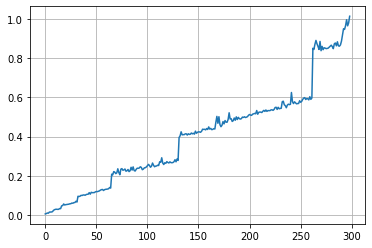

In [17]:
plt.plot(elapsed)
plt.grid()
#We can see intermittent surges at some points, which must be the time when resizing happens. However, overall elapsed time follows O(n), 
#which shows why amortization analysis makes sense.


In [19]:
#---C5-18---Give a formal proof that any sequence of n append or pop operations on an initially empty dynamic array takes O(n) time, if using the strategy
#described in Exercise C-5.16.
"""
We've already proven the append side of things.  You can provide a similar proof for popping

Each shrink operation takes N time and must be performed every N after the first division has been completed

Before the first division, it takes 3N, since you are required to reach 1/4 of the total capacity

After the first division, you start at 1/2 the new capacity and have to make it down to 1/4 of the capacity.
That means that you go from N to N/2. (or 2N to N looking at it from the other way)

As before, that means that you need N * [Dollars] = N, or 1 extra cyber-dollar per operation for this to work


Another way to consider this is that there are a minimum of N/2 operations (N being your starting value)
between any growth or shrink operations. For instance, if you grow at N=20:
 - you will not shrink until N gets to 10 (N/2 operations)
 - or double again until N gets to 40 (which gives you N operations)
 
 If you shrink at 20:
 - you will not shrink until N gets to 10 (N/2 operations)
 - you will not grow until N gets to 40 (2N operation)
 

Therefore, if we amortize each operation against N/2 minimum calls to the function, we have:
pop -> overcharge 1 dollar per operation
append -> overcharge 4 dollars per operation (N/2*dollars = 2N in the worst case)


"""

"\nWe've already proven the append side of things.  You can provide a similar proof for popping\n\nEach shrink operation takes N time and must be performed every N after the first division has been completed\n\nBefore the first division, it takes 3N, since you are required to reach 1/4 of the total capacity\n\nAfter the first division, you start at 1/2 the new capacity and have to make it down to 1/4 of the capacity.\nThat means that you go from N to N/2. (or 2N to N looking at it from the other way)\n\nAs before, that means that you need N * [Dollars] = N, or 1 extra cyber-dollar per operation for this to work\n\n\nAnother way to consider this is that there are a minimum of N/2 operations (N being your starting value)\nbetween any growth or shrink operations. For instance, if you grow at N=20:\n - you will not shrink until N gets to 10 (N/2 operations)\n - or double again until N gets to 40 (which gives you N operations)\n \n If you shrink at 20:\n - you will not shrink until N gets t

In [20]:
#---C5-19---Consider a variant of Exercise C-5.16, in which an array of capacity N is resized to capacity precisely that of the number of elements, 
#any time the number of elements in the array goes strictly below N/4. Give a formal proof that any sequence of n append or pop operations on an initially
#empty dynamic array takes O(n) time.
"""
After a growth:
- You will not grow again until at least 2N
- You will not shrink until at least N/2

After a shrink:
- You will grow again at a subsequent append, but then not grow or shrink until 2N, N/2 respectively
- You will not shrink again until at least N/2



Shrinking takes O(N) and growing takes O(N).  Therefore, we can say that the combination of a growth and shrink operation
takes O(N) time.  Therefore, the easiest way to prove this is to assume that every shrink will be immediately followed by
a growth operation, requiring 2N operations.  At which point it will not grow again until 2N

As before, following a growth you need to budget an extra 2 cyber dollars per append  to pay for it, 
but 2 cyber dollar for a pop, since a shrink operation now costs 2N (to do the shrink plus growth)

Following a shrink, you still only need to budget 2 extra cyber dollars for an append, but:
    [N/2]* cyber dollars = 2N
    cyber dollars = 4
    4 cyber dollars per operation
    
Overall, if we budget 2 cyber dollars for an append and 4 for a pop, we have covered all cases

"""

'\nAfter a growth:\n- You will not grow again until at least 2N\n- You will not shrink until at least N/2\n\nAfter a shrink:\n- You will grow again at a subsequent pop, but then not grow or shrink until 2N, N/2 respectively\n- You will not shrink again until at least N/2\n\n\n\nShrinking takes O(N) and growing takes O(N).  Therefore, we can say that the combination of a growth and shrink operation\ntakes O(N) time.  Therefore, the easiest way to prove this is to assume that every shrink will be immediately followed by\na growth operation, requiring 2N operations.  At which point it will not grow again until 2N\n\nAs before, following a growth you need to budget an extra 2 cyber dollars per append  to pay for it, \nbut 2 cyber dollar for a pop, since a shrink operation now costs 2N (to do the shrink plus growth)\n\nFollowing a shrink, you still only need to budget 2 extra cyber dollars for an append, but:\n    [N/2]* cyber dollars = 2N\n    cyber dollars = 4\n    4 cyber dollars per ope

In [ ]:
#---C5-20---Consider a variant of Exercise C-5.16, in which an array of capacity N, is resized to capacity precisely that of the number of elements, 
#any time the number of elements in the array goes strictly below N/2. Show that there exists a sequence of n operations that requires Ω(n 2 ) time to execute.
"""
O(n) holds in the previous example, because there is a limit to the number of growths/shrinks you can do
in immediate succession, and there is always a buffer zone in between these clusters that scales with N

In this case, however, after you shrink you can immediately grow and after you grow you can immediately shrink.

This means that there is a pop, append loop where each one takes O(n) time to complete without an opportunity to 
amortize against it.  Overall, n insertions/pops that take O(n) time each will result in O(n^2)

"""

In [22]:
#---C5-21---In Section 5.4.2, we described four different ways to compose a long string: (1) repeated concatenation, (2) appending to a temporary list and
#then joining, (3) using list comprehension with join, and (4) using generator comprehension with join. Develop an experiment to test the efﬁciency
#of all four of these approaches and report your ﬁndings.
import time
import matplotlib.pyplot as plt
import pandas as pd

class string_comparator():
    def __init__(self, num_tests = 100):
        self._num_tests = num_tests
        
    def timer(func):
        def wrapper(*args, **kwargs):
            start = time.time()
            for _ in range(args[0]._num_tests):
                func(*args)
            
            end = time.time()
            return(end-start)
        return wrapper

    @timer
    def _string_append(self, string):
        S = ''
        for char in string:
            S += char
        return S
    
    @timer
    def _list_then_join(self, string):
        S = []
        for char in string:
            S.append(char)
        return ''.join(S)
    
    @timer
    def _join_lc(self, string):
        return ''.join([x for x in string])
    
    @timer
    def _join_generator(self, string):
        return ''.join(x for x in string)


    def test_methods(self, test_cases):
        results = pd.DataFrame()
        for n in test_cases:
            string = 'a'*n
            for name, func in [('String Append', self._string_append),
                         ('List then Join', self._list_then_join),
                         ('Join List Comprehension', self._join_lc), 
                         ('Join Generator', self._join_generator)]:
                results.loc[name, n] = func(string)/n
        return results
        
        
tester = string_comparator()
tester.test_methods([10**x for x in range(7)])      


"""
Surprisingly, they all seem to perform in O(n) time.  As the textbook mentioned, there must be something below
the hood that makes the string append O(n) rather than O(n^2).  Note however that string append consistently did worse
than the others in terms of total time

The list comprehension and generator oscillated between first place

"""

'\nSurprisingly, they all seem to perform in O(n) time.  As the textbook mentioned, there must be something below\nthe hood that makes the string append O(n) rather than O(n^2).  Note however that string append consistently did worse\nthan the others in terms of total time\n\nThe list comprehension and generator oscillated between first place\n\n'

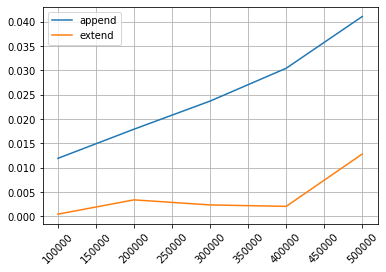

In [24]:
#---C-22---Develop an experiment to compare the relative efﬁciency of the extend method of Python’s list class versus using repeated calls to append to
#accomplish the equivalent task.
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e5, 2e5, 3e5, 4e5, 5e5]))
for i in test_num:
    
    tba = list(range(i))
    
    start = time.time()
    for i in tba:
        x.append(i)
    end = time.time()
    time_x.append(end-start)


    start = time.time()
    x.extend(tba)
    end = time.time()
    time_y.append(end-start)
plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='extend')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

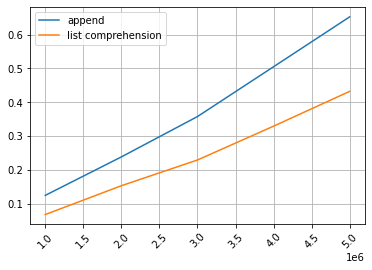

In [25]:
#---C5-23---Based on the discussion on constructing new list (list comprehension vs repeatedly appending), 
#develop an experiment to compare the efficiency of Python's list comprehension syntax versus the construction of a list by means of repeated calls to append.
x, y = [], []
time_x, time_y = [], []

test_num = list(map(int, [1e6, 2e6, 3e6, 4e6, 5e6]))
for i in test_num:
    
    start = time.time()
    for k in range(i):
        x.append(k * k)
    end = time.time()
    time_x.append(end-start)

    start = time.time()
    x = [k * k for k in range(i)]
    end = time.time()
    time_y.append(end-start)


plt.plot(test_num, time_x, label='append')
plt.plot(test_num, time_y, label='list comprehension')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

In [27]:
#---C5-24---Perform experiments to evaluate the efficiency of the remove method of Python's list class. 
#Use known values so that all removals occur either at the beginning, middle, or end of the list.
import copy
N = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
df = pd.DataFrame(columns=N)
for n in N:
    lst = [i for i in range(n)]
    
    rm_fst = copy.deepcopy(lst)
    rm_mid = copy.deepcopy(lst)
    rm_fin = copy.deepcopy(lst)
    
    elapsed = []
    
    start = time.time()
    rm_fst.remove(0)
    end = time.time()
    elapsed.append(end - start)
    
    start = time.time()
    rm_fst.remove(n // 2)
    end = time.time()
    elapsed.append(end - start)
    
    start = time.time()
    rm_fst.remove(n - 1)
    end = time.time()
    elapsed.append(end - start)
    
    df[n] = elapsed
df.insert(0, column='k', value=['k=0', 'k=n//2', 'k=n'])
df

,k,100,1000,10000,100000,1000000,10000000
0,k=0,0.000004,0.000001,0.000006,0.000060,0.000595,0.006154
1,k=n//2,0.000003,0.000006,0.000069,0.000941,0.006297,0.065164
2,k=n,0.000003,0.000012,0.000129,0.001423,0.012755,0.129272


In [ ]:
#---C5-25---The syntax data.remove(value) for Python list data removes only the ﬁrst occurrence of element value from the list. Give an implementation of a
#function, with signature remove all(data, value), that removes all occurrences of value from the given list, such that the worst-case running time
#of the function is O(n) on a list with n elements. Not that it is not efﬁcient enough in general to rely on repeated calls to remove.
"""
Note, to make this efficient, we shouldn't go through the data more than once

To accomplish this, we can have a 'gap counter' that tells us how many places to move the non-target value back

"""

class DynamicArray_RemoveAll(DynamicArray):
    def __setitem__(self, index, value):
        if not 0<=index<self._n: raise IndexError('Index out of range')
        self._A[index] = value
    
    
    def remove_all(self, value):
        num_removed = 0
        for i in range(self._n):
            if self[i] == value:
                num_removed += 1
                self[i] = None #Note, this is not necessary since it will be overwritten
            else:
                self[i-num_removed] = self[i]
                
        self._n -= num_removed

In [28]:
#---C5-26---Let B be an array of size n ≥ 6 containing integers from 1 to n − 5, inclusive, with exactly ﬁve repeated. 
#Describe a good algorithm for ﬁnding the ﬁve integers in B that are repeated.
"""
Two options:

1) Use a set and add each element one by one.  This will be done in O(n) time

2) Use the recommended method (sorting first), which will be done in O(nlogn) + O(n) time

Note that the order is different because option 1 finds them in the order that they are in the array
and option 2 finds them in increasing numerical order

"""

def find_5_set(S):
    prev_nums = set()
    repeats = []
    for element in S:
        if element in prev_nums:
            repeats.append(element)
        else:
            prev_nums.add(element)
    return repeats

def find_5_sorted(S):
    S2 = sorted(S)
    repeats = []
    for i in range(len(S)-1):
        if S2[i] == S2[i+1]: repeats.append(S2[i])
    return repeats


S = list(range(100))
#Insert the repeats
for index, value in [(4,36), (83, 80), (20, 56), (54, 32), (10, 21)]:
    S[index] = value
    
print(find_5_set(S))
print(find_5_sorted(S))

[21, 36, 32, 56, 80]
[21, 32, 36, 56, 80]


In [2]:
#---C5-27---Given a Python list L of n positive integers, each represented with k = ceil(log n) + 1 bits, describe an O(n)-time method for ﬁnding
#a k-bit integer not in L.
"""
This problem is a little confusing, but my understanding from the hint is that you have n possible integers
in the range of zero to whatever a ceil(log(n)) + 1 bit integer is for that value of n

For example, if n = 10, you can have any (4+1) bit integer in the list L.

The relationship between the integer range and bits is 0 to (2**bits -1)

So for n = 10, we have integers form 0 to 2**5-1, which is 0 to 31

As a general rule, since we can only go one bit above the ceiling of log(n), the maximum number can be at most
log(n) + 1 + 1, so the maximum number is: 2**(log(n) + 2) = 4*n
As a result, we can create an array (as hinted in the book) of 4n and use that to store the values of 
the elements in L

Afterwards, anything in our results array that has a value of zero is not in the list

Note that this can also be achieved using sets or dictionaries, and then iterating from 0 to 4n and reporting
anything that is not in the set/dictionary
"""
import math
import random

def find_missing(S):
    max_num = 2**(math.ceil(math.log(len(S), 2))+1)
    num_count = [0]*(max_num+1)
    for element in S:
        num_count[element] += 1
        
    missing_nums = []
    for i in range(len(num_count)):
        if num_count[i] == 0:
            missing_nums.append(i)
            
    return missing_nums

In [3]:
#---C5-28---Argue why any solution to the previous problem must run in Ω(n) time.
"""
Unlike the task of trying to find an object or determine whether a specific object is not in 
our list, this requires us to find any number that isn't in the list, so there is no failure condition
that short-circuits the loop

As a result, we at least have to traverse each element of the list to 'know' that it is not an option for us

Since it must do this as a minimum every time, it must run in Theta(n) time


"""

"\nUnlike the task of trying to find an object or determine whether a specific object is not in \nour list, this requires us to find any number that isn't in the list, so there is no failure condition\nthat short-circuits the loop\n\nAs a result, we at least have to traverse each element of the list to 'know' that it is not an option for us\n\nSince it must do this as a minimum every time, it must run in Theta(n) time\n\n\n"

In [4]:
#---C5-29---A useful operation in databases is the natural join. If we view a database as a list of ordered pairs of objects, 
#then the natural join of databases A and B is the list of all ordered triples (x, y, z) such that the pair (x, y) is in
#A and the pair (y, z) is in B. Describe and analyze an efﬁcient algorithm for computing the natural join of a list A of n pairs and a list B of m pairs.
"""
For this problem, the answer seems to lie in the fact that y is common to both sets
As a result, we want an algorithm that can map all of the x's in the (x,y) pair to their
y value and then use that mapping to pair up the (y,z) pairs from the second list

For that to happen, all we need to do is iterate through A once to create the mapping and then 
B once to create the natural join.

If we can keep the internal operations for each element O(n), then out final algorithm will be
O(n+m)


"""

def natural_join(A, B):
    #First we create a mapping...
    Y_map = {}
    for x, y in A:
        if y in Y_map: Y_map[y].add(x)
        else: Y_map[y] = set({x})
    
    natural_join = []
    for y, z in B:
        if y in Y_map:
            natural_join.extend([(x, y, z) for x in Y_map[y]])
        
    return natural_join

"""
Analysis:

The first part iterates O(n) times with each iteration taking O(1) time -> O(n)

The second part iterates O(m) times, with each join taking O(n) in the worst case.

For example, if all items in B start with 1 and all items in A end with 1, there will be m*n combos

Therefore the overall performance is O(n) + O(m*n), which is O(m*n)


"""

'\nAnalysis:\n\nThe first part iterates O(n) times with each iteration taking O(1) time -> O(n)\n\nThe second part iterates O(m) times, with each join taking O(n) in the worst case.\n\nFor example, if all items in B start with 1 and all items in A end with 1, there will be m*n combos\n\nTherefore the overall performance is O(n) + O(m*n), which is O(m*n)\n\n\n'

In [5]:
#---C5-30---When Bob wants to send Alice a message M on the Internet, he breaks M into n data packets, numbers the packets consecutively, and injects them
#into the network. When the packets arrive at Alice’s computer, they may be out of order, so Alice must assemble the sequence of n packets in order
#before she can be sure she has the entire message. Describe an efﬁcient scheme for Alice to do this, assuming that she knows the value of n. What
#is the running time of this algorithm?
"""
Here Alice receives one packet at a time, which means that she can build the final message as she recieves it,
which is perfect for the insertion sort that we learned earlier in the chapter.

Later we will figure out a better way to do this (ie. in O(nlogn) time), but for now we can achieve this in O(n^2) time

It may be tempting to use a binary search to find the best location in log(n) time, but we have to potentially do 
n shifts at every insertion anyway, so it won't give bring us down to O(nlogn) overall.  Regardless, we will use the binary 
search for practice (alternatively, you can use the insertion sort in Code Fragment 5.10 just as easily, and for a more simple solution!)

Again, binary search is just for fun.  The more straightforward approach in just to do an insertion sort

"""
import random


def binary_search(array, low, high, target):
    if low>=high:
        return low
    
    mid = (low+high)//2
    if array[mid] == target:
        return mid
    
    elif array[mid] > target:
        return binary_search(array, low, mid-1, target)
    
    else:
        return binary_search(array, mid+1, high, target)
      
#Note, we simulate the order of the packets using a list of integers from 1-10
def packet_reciever(S):
    final_array = []
    for i in range(len(S)):
        packet = S[i] #simulates her recieving that packet
        index = binary_search(final_array, 0, len(final_array), packet)
        index = min(index, len(final_array)-1)
        if final_array and final_array[index] < packet:
            index += 1
        final_array.insert(index, packet)
        print(f'New Packet: {packet} ->', '\t', final_array)

        
S = list(range(17))
random.shuffle(S)
packet_reciever(S)




"""
Alterative Approach - Insertion Sort!
"""
def insertion_sort(S, current_position):
    i = current_position
    while i>0 and S[i]<S[i-1]: #Note, this will short circuit at i = 0 so you will never check S[0-1]
        S[i], S[i-1] = S[i-1], S[i]
        i -= 1


def packet_reciever_2(S):
    final_array = [None]*len(S)
    for i in range (len(S)):
        final_array[i] = S[i]
        insertion_sort(final_array, i)
        print(f'New Packet: {S[i]} ->', '\t', final_array)

        
print('\n\nApproach 2 - Insertion Sort')        
packet_reciever_2(S)

New Packet: 1 -> 	 [1]
New Packet: 6 -> 	 [1, 6]
New Packet: 10 -> 	 [1, 6, 10]
New Packet: 12 -> 	 [1, 6, 10, 12]
New Packet: 5 -> 	 [1, 5, 6, 10, 12]
New Packet: 3 -> 	 [1, 3, 5, 6, 10, 12]
New Packet: 9 -> 	 [1, 3, 5, 6, 9, 10, 12]
New Packet: 4 -> 	 [1, 3, 4, 5, 6, 9, 10, 12]
New Packet: 15 -> 	 [1, 3, 4, 5, 6, 9, 10, 12, 15]
New Packet: 14 -> 	 [1, 3, 4, 5, 6, 9, 10, 12, 14, 15]
New Packet: 16 -> 	 [1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 16]
New Packet: 0 -> 	 [0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 16]
New Packet: 11 -> 	 [0, 1, 3, 4, 5, 6, 9, 10, 11, 12, 14, 15, 16]
New Packet: 7 -> 	 [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16]
New Packet: 2 -> 	 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16]
New Packet: 13 -> 	 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]
New Packet: 8 -> 	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


Approach 2 - Insertion Sort
New Packet: 1 -> 	 [1, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [6]:
#---C5-31---Describe a way to use recursion to add all the numbers in an n × n data set, represented as a list of lists.
"""
This problem is trivial if you know that you can use isinstance(obj, class) to 
determine if something is a list or not

This approach works for any combination of lists within lists, as long as 
all of the final values support the + operation (ie. float and int)

"""


def list_r(S):
    total = 0
    if not isinstance(S, list):
        return S
    else:
        for element in S: total+= list_r(element)
    return total

def sum_list(S):
    total = list_r(S)
    return total

l = [[1,1,1,1,1], [2,2], 5]
sum_list(l)
    

14

## Projects

In [7]:
#---P5-32---Write a Python function that takes two three-dimensional numeric data sets and adds them componentwise.
"""
Note, __len__ and __getitem__ are specifically created for this purpose, and may not
reflect what you would normally want these to do for a matrix

"""
import operator
class Matrix():
    #For subclassing...
    @classmethod
    def _get_cls(cls):
        return cls
    
    
    def __init__(self, data, num_dims = 3):
        self._data = data
        self._dimensions = []
        self._ndims = num_dims
        temp = data
        for i in range(num_dims):
            self._dimensions.append(len(temp))
            temp = temp[0]   
            
            
    def __getitem__(self, index):
        return self._data[index]
    
    def __len__(self):
        return (self._dimensions[0])
        
        
    def __repr__(self):
        return (f'{self._ndims}D Matrix with dimensions {self._dimensions}:' + '\n' + f'{self._data}')
    
    def _create_empty_3D_dataset(self, dimensions):
        a = None
        for d in reversed(dimensions):
            a = [None for _ in range(d)] if a is None else [a.copy() for _ in range(d)]
        return self._get_cls()(a, len(dimensions))
    
    
    def _op_lists_r(self, a, b, c, operation):
        """
        a + b = c
        """
        assert len(a) == len(b) == len(c), 'Length mismatch'
        for i in range(len(a)):
            if isinstance(a[i], list): self._op_lists_r(a[i], b[i], c[i], operation)
            else: c[i] = operation(a[i],b[i])
        return c
            
    
    def __add__(self, other):
        assert self._dimensions == other._dimensions, f'Dimension mismatch {self._dimensions}, {other._dimensions}'
        c = self._create_empty_3D_dataset(self._dimensions)
        return (self._op_lists_r(self._data, other._data, c, operator.add))
        
m1 = Matrix([[[i for i in range(10)] for i in range(7)] for i in range(4)])
m2 = Matrix([[[i for i in range(10)] for i in range(7)] for i in range(4)])
print(m1)

print(m1 + m2)


3D Matrix with dimensions [4, 7, 10]:
[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]]
3D Matrix with dimensions [4, 7, 10]:
[[[0, 2, 4, 6, 8, 1

In [8]:
#---P5-33---Write a Python program for a matrix class that can add and multiply two-dimensional arrays of numbers, assuming the dimensions agree 
#appropriately for the operation.
"""
Based on how we created the array before, we can subclass and add elementwise multiplication easily

Note, if we are talking about matrix multiplication (the dot product), we should stick to 2D and 
assert accordingly



"""

class MatrixwMult(Matrix):
    def __mul__(self, other):
        assert self._dimensions == other._dimensions, f'Dimension mismatch {self._dimensions}, {other._dimensions}'
        c = self._create_empty_3D_dataset(self._dimensions)
        return (self._op_lists_r(self._data, other._data, c, operator.mul))
    
    def dot_product(self, other):
        assert len(self._dimensions) == 2, 'Dot product not implemented for rank>2'
        
        
        ar, ac = self._dimensions
        br, bc = other._dimensions
        
        c = self._create_empty_3D_dataset([ar, bc])

        a = self._data
        b = other._data
        
        print(c._dimensions)
        
        for i in range(ar):
            for j in range(bc):
                total = 0
                for k in range(ac):
                    total += a[i][k]*b[k][j]
                    #print (total, a[i][k], b[k][j], 'Index', i, j, k)
                c._data[i][j] = total
                             
        return c
            
        
        
        
        
        
    
mm1 = MatrixwMult([[[i for i in range(10)] for i in range(7)] for i in range(4)])
mm2 = MatrixwMult([[[i for i in range(10)] for i in range(7)] for i in range(4)])
    
print(mm1*mm2)


mmm1 = MatrixwMult([[1,2,3],[4,5,6]], 2)
mmm2 = MatrixwMult([[1,2,3],[1,2,3],[1,2,3]], 2)


mmm1.dot_product(mmm2)

3D Matrix with dimensions [4, 7, 10]:
[[[0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]], [[0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]], [[0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]], [[0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81], [0, 

2D Matrix with dimensions [2, 3]:
[[6, 12, 18], [15, 30, 45]]

In [9]:
#---P5-34---Implement a class, SubstitutionCipher, with a constructor that takes a string with the 26 uppercase letters in an arbitrary order and uses
#that for the forward mapping for encryption (akin to the self. forward string in our CaesarCipher class of Code Fragment 5.11). You should derive the
#backward mapping from the forward version.
class CaesarCipher:
    """Class for doing encryption and decrpytion using a Caesar cipher."""
    
    def __init__(self, shift):
        """Construct Caesar cipher using given integer shift for rotation."""
        encoder = [None] * 26
        decoder = [None] * 26
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord('A'))
            decoder[k] = chr((k - shift) % 26 + ord('A'))
        self._forward = ''.join(encoder)
        self._backward = ''.join(decoder)
    
    def encrpyt(self, message):
        """Return string representing encripted message."""
        return self._transform(message, self._forward)
    
    def decrpyt(self, secret):
        """Return decrpyted message given encrpyted secret."""""
        return self._transform(secret, self._backward)
    
    def _transform(self, original, code):
        """Utility to perform transformation based on given code string."""""
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
            elif msg[k].islower():
                j = ord(msg[k]) - ord('a')
                msg[k] = code[j]
        return ''.join(msg)
    


In [12]:
#---P5-35---Implement a class, SubstitutionCipher, with a constructor that takes a string with the 26 uppercase letters in an arbitrary order 
#and uses that for the forward mapping for encryption (akin to the self. forward string in our CaesarCipher class of Code Fragment 5.11). 
#You should derive the backward mapping from the forward version.

class SubstitutionCipher():
    def __init__(self, code = 'BCDEFGHIJKLMNOPQRSTUVWXYZA'):
        self._forward = code
        temp_bwd = [None]*26
        for i in range(len(code)):
            index = ord(self._forward[i])-ord('A')
            temp_bwd[index] = chr(i + ord('A'))
        self._backward = ''.join(temp_bwd)
        
        
    def _translate(self, message, code):
        result = []
        for char in message:
            if char.isupper():
                result.append(code[ord(char)-ord('A')])
            else:
                result.append(char)
        return ''.join(result)
    
    def encode(self, message):
        return self._translate(message, self._forward)
    
    def decode(self, message):
        return self._translate(message, self._backward)

                     
sc = SubstitutionCipher()
        
secret = sc.encode("I'VE COME TO TALK TO YOU AGAIN")
print(secret)
message = sc.decode(secret)
print(message)

J'WF DPNF UP UBML UP ZPV BHBJO
I'VE COME TO TALK TO YOU AGAIN


In [13]:
#---P5-36---Redesign the CaesarCipher class as a subclass of the SubstitutionCipher from the previous problem.

class CaesarCipher2(SubstitutionCipher):
    def __init__(self, shift=3):
        forward = ''.join(chr((i+shift)%26 + ord('A')) for i in range(26))
        super().__init__(forward)
        
sc = CaesarCipher2()
        
secret = sc.encode("BECAUSE A VISION SOFTLY CREEPING")
print(secret)
message = sc.decode(secret)
print(message)
        


EHFDXVH D YLVLRQ VRIWOB FUHHSLQJ
BECAUSE A VISION SOFTLY CREEPING


In [14]:
#---P5-37---Design a RandomCipher class as a subclass of the SubstitutionCipher from Exercise P-5.35, so that each instance of the class relies on a random
#permutation of letters for its mapping.
"""
As before, now that P5-35 is done, all we have to worry about is creating a forward string.
This is really easy using the random.shuffle method

"""

class RandomCipher(SubstitutionCipher):
    def __init__(self):
        forward = [chr(i+ord('A')) for i in range(26)]
        random.shuffle(forward)
        super().__init__(''.join(forward))

for _ in range(10):
    rc = RandomCipher()

    secret = rc.encode("LEFT IT'S SEEDS WHILE I WAS SLEEPING")
    print(secret)
    message = rc.decode(secret)
    print(message, end = '\n\n')

WLVE QE'N NLLUN PBQWL Q PIN NWLLCQTH
LEFT IT'S SEEDS WHILE I WAS SLEEPING

UBHP KP'R RBBCR VOKUB K VXR RUBBSKLY
LEFT IT'S SEEDS WHILE I WAS SLEEPING

TKML UL'R RKKER PJUTK U PIR RTKKZUBQ
LEFT IT'S SEEDS WHILE I WAS SLEEPING

TMEP AP'S SMMWS HKATM A HYS STMMBALC
LEFT IT'S SEEDS WHILE I WAS SLEEPING

KHNU CU'V VHHJV IZCKH C IQV VKHHSCEG
LEFT IT'S SEEDS WHILE I WAS SLEEPING

DNGC OC'H HNNIH TZODN O TSH HDNNWOVR
LEFT IT'S SEEDS WHILE I WAS SLEEPING

GZWI BI'J JZZSJ ROBGZ B RTJ JGZZYBCF
LEFT IT'S SEEDS WHILE I WAS SLEEPING

RYUN JN'V VYYIV XMJRY J XQV VRYYKJZH
LEFT IT'S SEEDS WHILE I WAS SLEEPING

SZDK CK'R RZZVR YECSZ C YUR RSZZPCTH
LEFT IT'S SEEDS WHILE I WAS SLEEPING

DHLQ CQ'X XHHIX WNCDH C WGX XDHHUCKP
LEFT IT'S SEEDS WHILE I WAS SLEEPING

